In [3]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [4]:
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [5]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(200, "stochastic_block_model")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
insights = Insights(["diversity", "disagreement"])
simulation = Simulation(1000, insights)

In [6]:
update_rule = UpdateRule(evaluation_bias=0, assimilation_bias=0, rewire_probability=0)
interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)

In [9]:
rewire_probabilities = [0, 0.5, 1]
initial_uncertainties = [0.1, 0.2, 0.3]
assimilation_biases = [0, 0.2, 0.6, 1]

all_results = {}
for i in range(len(initial_uncertainties)):
    for e in range(len(rewire_probabilities)):
        update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=assimilation_biases[i], rewire_probability=rewire_probabilities[e])
        interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
        unique = Distribution(type="unique", value=initial_uncertainties[i])
        agent_network.set_uncertainties(unique)
        assimilation_biases = [0, 0.2, 0.6, 1]
        div_results = []
        for assimilation_bias in assimilation_biases:
            interactions.update_rule.assimilation_bias = assimilation_bias
            simulation.run(interactions, agent_network)
            div_results.append(simulation.insights.diversity_evolution)
        all_results[(i,e)] = div_results

Progress: 100%|██████████| 1000/1000 [00:06<00:00, 159.83it/s]


/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_62902/93797102.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


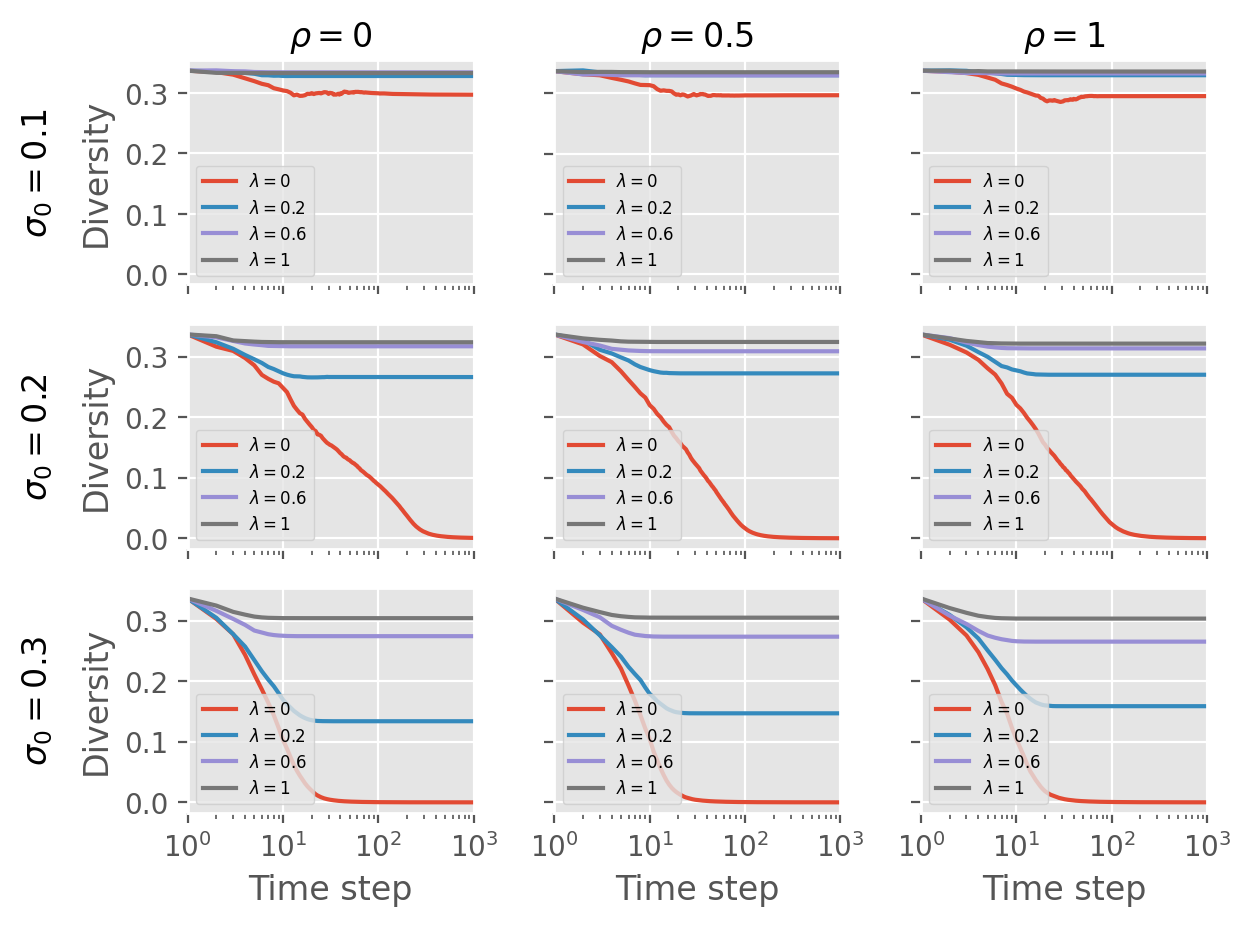

In [11]:
x_num = len(rewire_probabilities)
y_num = len(initial_uncertainties)

fig, axs = plt.subplots(x_num, y_num, sharex=True, sharey=False)
rows = [r'$\sigma_0 = {}$'.format(row) for row in initial_uncertainties]
cols = [r'$\rho = {}$'.format(col) for col in rewire_probabilities]
handles = []
labels = []

for i in range(x_num):
    for e in range(y_num):
        ax = axs[i,e]
        ax.set_xscale("log")
        for k in range(len(all_results[(i, e)])):
            ax.plot(all_results[(i, e)][k], label=r'$\lambda = {}$'.format(assimilation_biases[k]))
            ax.legend(loc="lower left", prop={'size': 6})
        ax.set_xlim(1, 1000)

pad = 5 

for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')
    
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
            xycoords=ax.yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center', rotation='vertical')
    
for ax in axs.flat:
    ax.set(xlabel='Time step', ylabel='Diversity')
    
for ax in axs.flat:
    ax.label_outer()

fig.show()
plt.tight_layout()
